In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [3]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

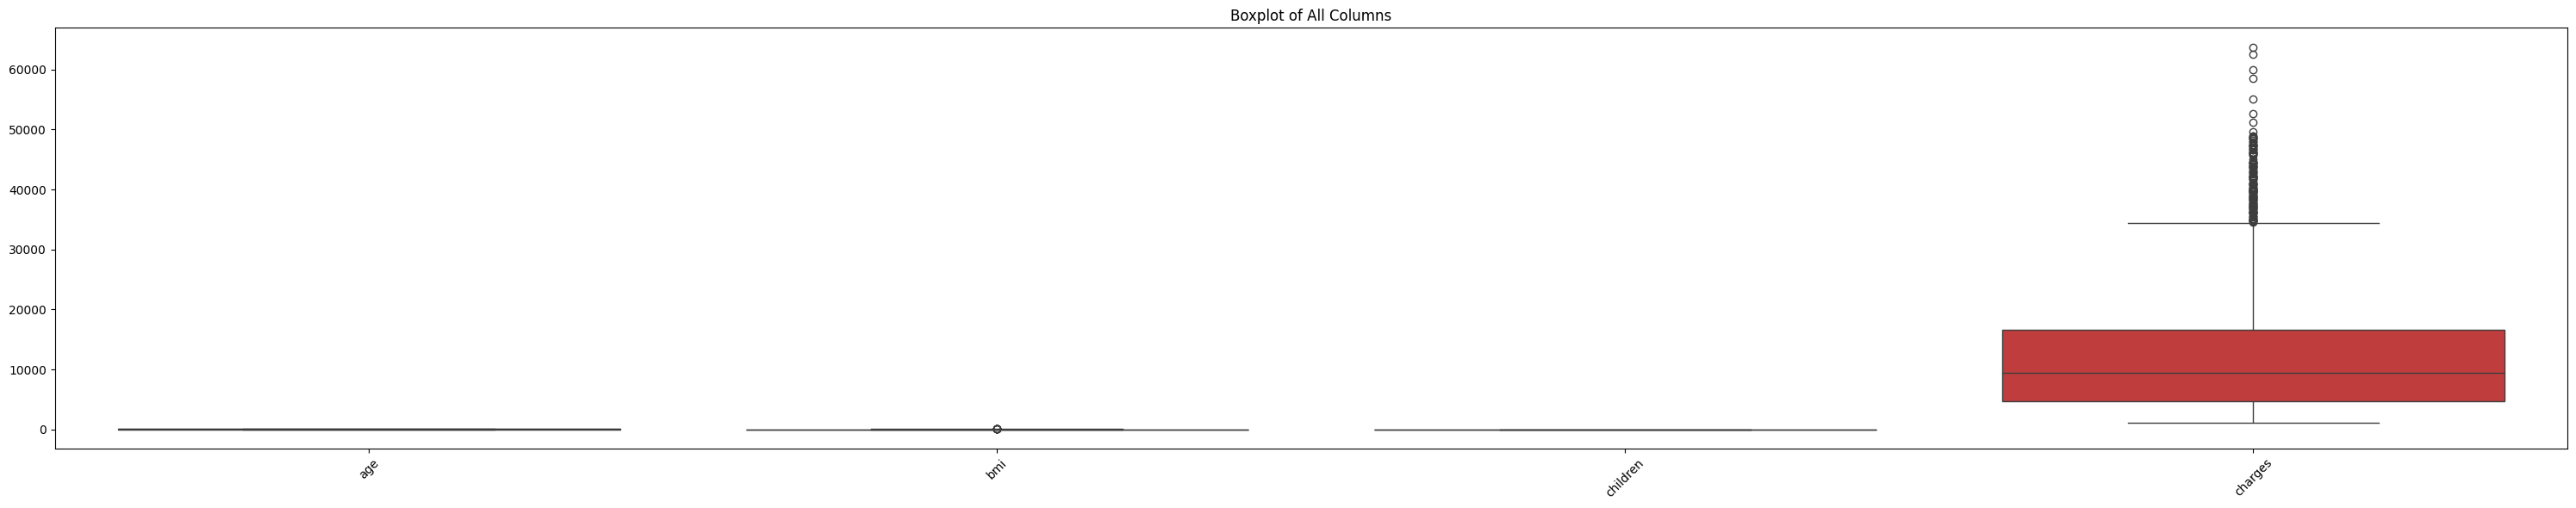

In [5]:
plt.figure(figsize=(30, 6)) 
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title("Boxplot of All Columns")

plt.tight_layout()
plt.show()

In [6]:
df2 = df.copy()
z=np.abs(stats.zscore(df2['age']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)


z=np.abs(stats.zscore(df2['bmi']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['children']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['charges']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

(array([], dtype=int64),)
(array([ 116,  847, 1047, 1317]),)
(array([  32,   71,  165,  412,  424,  437,  567,  639,  875,  930,  935,
        967,  982, 1082, 1113, 1127, 1242, 1269]),)
(array([  33,  536,  569,  810, 1127, 1211, 1279]),)


In [7]:
df2.reset_index(drop=True, inplace=True)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   int64  
 4   smoker    1309 non-null   object 
 5   region    1309 non-null   object 
 6   charges   1309 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 71.7+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


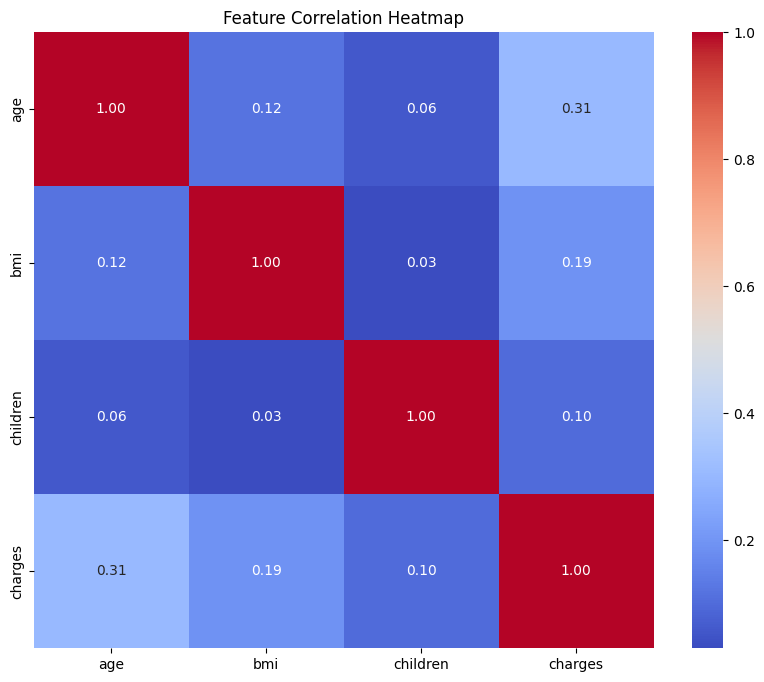

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df2[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\Manik\AppData\Local\Temp\ipykernel_28180\4065626142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='region', y='charges', estimator='mean', palette='muted')


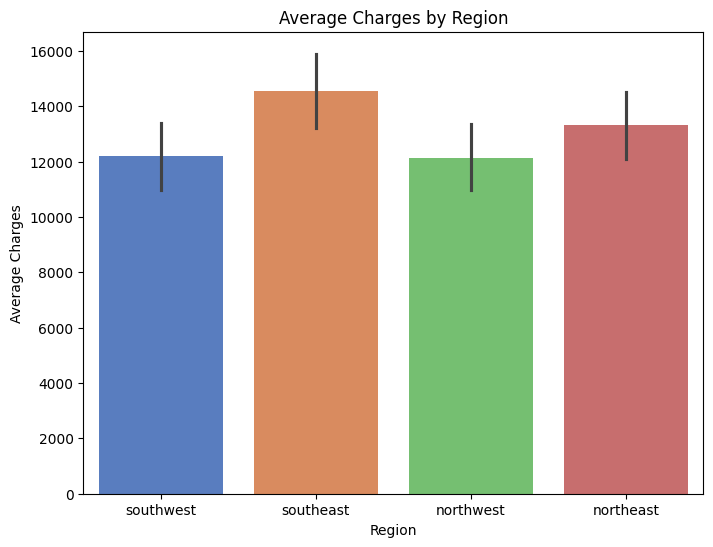

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df2, x='region', y='charges', estimator='mean', palette='muted')
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

C:\Users\Manik\AppData\Local\Temp\ipykernel_28180\1802996047.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df2, x='region', y='charges', hue='smoker', estimator='mean', ci='sd', palette='Set2')


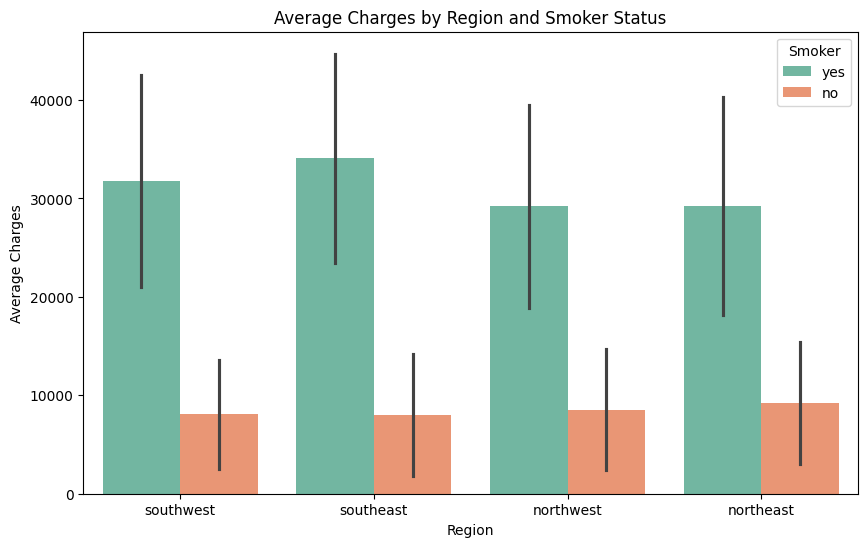

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='region', y='charges', hue='smoker', estimator='mean', ci='sd', palette='Set2')
plt.title('Average Charges by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.legend(title='Smoker')
plt.show()


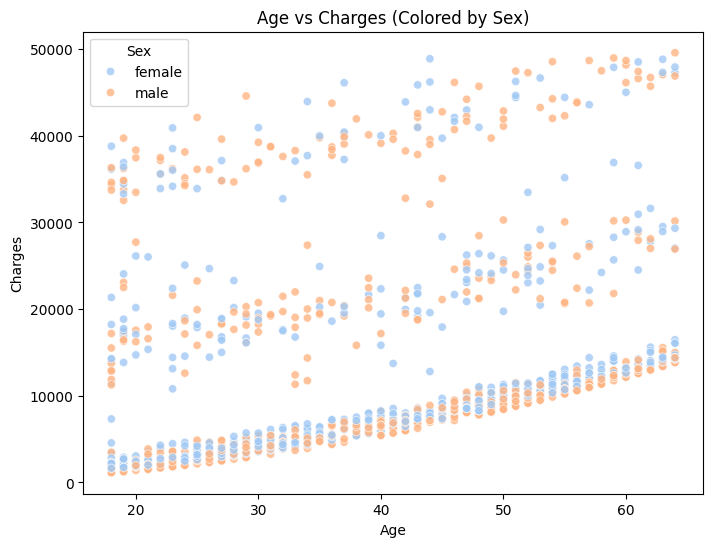

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='age', y='charges', hue='sex', palette='pastel', alpha=0.8)
plt.title('Age vs Charges (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex')
plt.show()


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

# Assume df2 is the DataFrame with the features and target variable

# Separate features and target
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 5516.523702783691
Mean Absolute Error: 3963.481608358779
R^2 Score: 0.7788249955111571


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assume df2 is the DataFrame with the features and target variable

# Separate features and target
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")


Root Mean Squared Error: 4238.319235264602
Mean Absolute Error: 2290.246268321832
R^2 Score: 0.8694453340019985
Model Score: 0.8694453340019985


c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
!pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import pickle

# Define the search space for hyperparameters
search_space = {
    'model__n_estimators': Integer(50, 500),         # Range for number of trees
    'model__max_leaf_nodes': Integer(10, 50),        # Range for max leaf nodes
    'model__min_samples_leaf': Integer(1, 10)        # Range for min samples per leaf
}

# Set up the BayesSearchCV with pipeline and RandomForestRegressor
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=100,                          # Number of parameter settings sampled
    cv=5,                               # 5-fold cross-validation
    scoring='neg_mean_squared_error',    # Use MSE as the scoring metric
    random_state=42,
    n_jobs=-1                            # Use all available cores
)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score (Negative MSE):", bayes_search.best_score_)

# Use the best estimator to predict on the test set
best_pipeline = bayes_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully!")


c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(50), np.int64(10), np.int64(500)] before, using random point [np.int64(24), np.int64(2), np.int64(220)]
  warnings.warn(
c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(21), np.int64(10), np.int64(500)] before, using random point [np.int64(13), np.int64(3), np.int64(415)]
  warnings.warn(
c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(20), np.int64(10), np.int64(500)] before, using

Best Parameters: OrderedDict({'model__max_leaf_nodes': 23, 'model__min_samples_leaf': 9, 'model__n_estimators': 341})
Best Score (Negative MSE): -21177030.338215124
Root Mean Squared Error: 3844.8557120290907
Mean Absolute Error: 2224.117197991532
R^2 Score: 0.8925602075884369
Pipeline saved successfully!


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assume df2 is the DataFrame with the features and target variable

# Separate features and target
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=32, learning_rate=0.1, max_depth=6, random_state=42))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")




Root Mean Squared Error: 4115.3485757720655
Mean Absolute Error: 2371.529126228531
R^2 Score: 0.8769112615507044
Pipeline saved successfully!


c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
